# House Prices
### Problem Statement
Selling our buying a house can be a dauanting task since the price depends upon many factors such as the area of the house, parking, location, number of bedrooms, number of bathrooms, etc. How can one estimate the price using data science and statistics?

The aim of this project is to predict the sale price for each house. [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) comes from Dean De Cock as an alternative to the popoular Boston Hosuing dataset. It has 79 explanatory variables, covering many aspects of the house.  


The training dataset has the 79 variables and the actual sale prices. It is going to be used for modeling, while the testing dataset will be used on Kaggle to quantifuy the quality of our model.

At the end of our project, we also aim to understand which features influence the sale price the most, allowing people and businesses to makes better decision. 


The following models are going to be used for prediction.

### Models:
- Baseline
- Linear Regression 
- Lasso
- Ridge
- Elasticnet
- KNN 
- Decision Trees
- Random Forest
- Adaboost
- Bagging

To quantifiy the success of our models, we'll use root mean square error (RMSE) as a scoring method. Therfore, the closer the value to zero, the more accurate our model is.

Credit: a great chunk of the EDA and modeling was inspired by the great notebook of [Serigne](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) on Kaggle.

 ### Data Dictionary 

To understand the dataset better, let's take a look over the following table:


Feature|Description
----|-----------
SalePrice | the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass| The building class
MSZoning| The general zoning classification
LotFrontage| Linear feet of street connected to property
LotArea| Lot size in square feet
Street| Type of road access
Alley| Type of alley access
LotShape| General shape of property
LandContour| Flatness of the property
Utilities| Type of utilities available
LotConfig| Lot configuration
LandSlope| Slope of property
Neighborhood| Physical locations within Ames city limits
Condition1| Proximity to main road or railroad
Condition2| Proximity to main road or railroad (if a second is present)
BldgType| Type of dwelling
HouseStyle| Style of dwelling
OverallQual| Overall material and finish quality
OverallCond| Overall condition rating
YearBuilt| Original construction date
YearRemodAdd| Remodel date
RoofStyle| Type of roof
RoofMatl| Roof material
Exterior1st| Exterior covering on house
Exterior2nd| Exterior covering on house (if more than one material)
MasVnrType| Masonry veneer type
MasVnrArea| Masonry veneer area in square feet
ExterQual| Exterior material quality
ExterCond| Present condition of the material on the exterior
Foundation| Type of foundation
BsmtQual| Height of the basement
BsmtCond| General condition of the basement
BsmtExposure| Walkout or garden level basement walls
BsmtFinType1| Quality of basement finished area
BsmtFinSF1| Type 1 finished square feet
BsmtFinType2| Quality of second finished area (if present)
BsmtFinSF2| Type 2 finished square feet
BsmtUnfSF| Unfinished square feet of basement area
TotalBsmtSF| Total square feet of basement area
Heating| Type of heating
HeatingQC| Heating quality and condition
CentralAir| Central air conditioning
Electrical| Electrical system
1stFlrSF| First Floor square feet
2ndFlrSF| Second floor square feet
LowQualFinSF| Low quality finished square feet (all floors)
GrLivArea| Above grade (ground) living area square feet
BsmtFullBath| Basement full bathrooms
BsmtHalfBath| Basement half bathrooms
FullBath| Full bathrooms above grade
HalfBath| Half baths above grade
Bedroom| Number of bedrooms above basement level
Kitchen| Number of kitchens
KitchenQual| Kitchen quality
TotRmsAbvGrd| Total rooms above grade (does not include bathrooms)
Functional| Home functionality rating
Fireplaces| Number of fireplaces
FireplaceQu| Fireplace quality
GarageType| Garage location
GarageYrBlt| Year garage was built
GarageFinish| Interior finish of the garage
GarageCars| Size of garage in car capacity
GarageArea| Size of garage in square feet
GarageQual| Garage quality
GarageCond| Garage condition
PavedDrive| Paved driveway
WoodDeckSF| Wood deck area in square feet
OpenPorchSF| Open porch area in square feet
EnclosedPorch| Enclosed porch area in square feet
3SsnPorch| Three season porch area in square feet
ScreenPorch| Screen porch area in square feet
PoolArea| Pool area in square feet
PoolQC| Pool quality
Fence| Fence quality
MiscFeature| Miscellaneous feature not covered in other categories
MiscVal| $Value of miscellaneous feature
MoSold| Month Sold
YrSold| Year Sold
SaleType| Type of sale
SaleCondition| Condition of sale

# Importing Packages

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew

plt.style.use("ggplot")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


#ignore warnings 
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 


# Exploratory Data Analysis (EDA)

In [72]:
# importing dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [73]:
# take a look at the training set
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
269,270,20,RL,NaN,7917,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2007,WD,Normal,148000
629,630,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal,168500
779,780,90,RL,78.0,10530,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,135000
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
480,481,20,RL,98.0,16033,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,326000


In [74]:
# take a look at the training set
df_test.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,1715,60,FV,65.0,8127,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
563,2024,60,RL,NaN,9205,Pave,NaN,IR1,Lvl,AllPub,...,196,0,NaN,NaN,NaN,0,6,2008,WD,Normal
445,1906,50,RL,78.0,15600,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
349,1810,70,RM,57.0,6406,Pave,Grvl,Reg,Lvl,AllPub,...,182,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal
252,1713,20,FV,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal


In [75]:
# duplicates for training and testing 
df_train.duplicated().sum(), df_train.duplicated().sum()

(0, 0)

In [76]:
# take a look at descriptive statistics summary
df_train.describe().transpose().sort_values(by=[ 'mean','std','min','max'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.00,2008.0,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.00,1980.0,2002.00,2010.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0


In [77]:
# Let's get some info about data types and null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [78]:
# take a look at dimensions 
df_train.shape

(1460, 81)

In [79]:
# take a look at dimensions 
df_test.shape

(1459, 80)

In [80]:
# get rid of the id column since it's not a feature
train_id = df_train['Id']
test_id = df_test['Id']

# drop the unncesseary column "Id"
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [81]:
# take a look at dimensions again
df_train.shape

(1460, 80)

In [82]:
# take a look at dimensions 
df_test.shape

(1459, 79)

We can notice that our training and testing have nearly identical number of rows. 

# Dealing with Outliers

In [83]:
# First let's take a look at some of the highly correlated features with sale price

In [84]:
corr = df_train.corr()
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

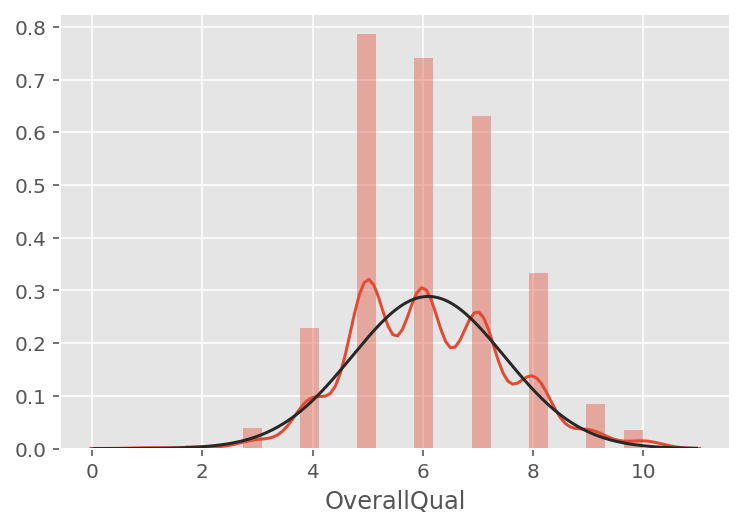

In [85]:
# 1st highest correlation
sns.distplot(df_train['OverallQual'], fit=norm);

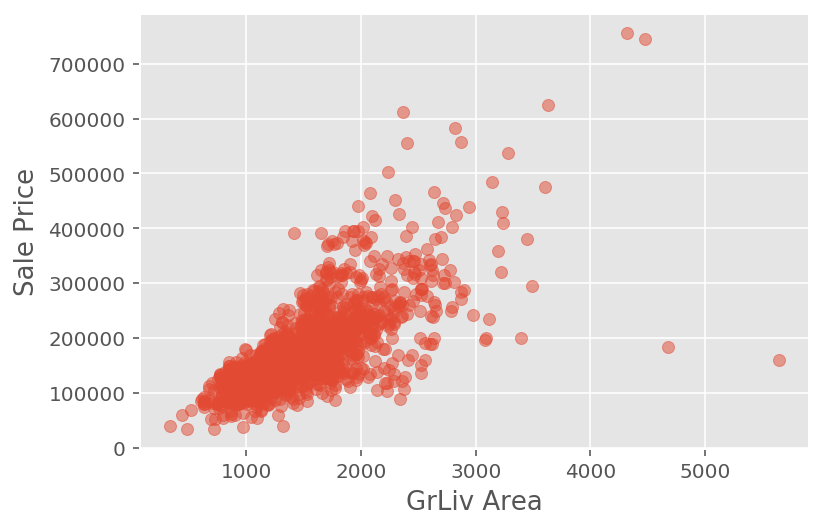

In [86]:
# 2nd highest correlation
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'], alpha=0.5)
plt.ylabel('Sale Price', fontsize=13)
plt.xlabel('GrLiv Area', fontsize=13)
plt.show()

We can easily see two outliers with large area but with low sale price. They don't seem to follow the trend and removing them will enhance the model.

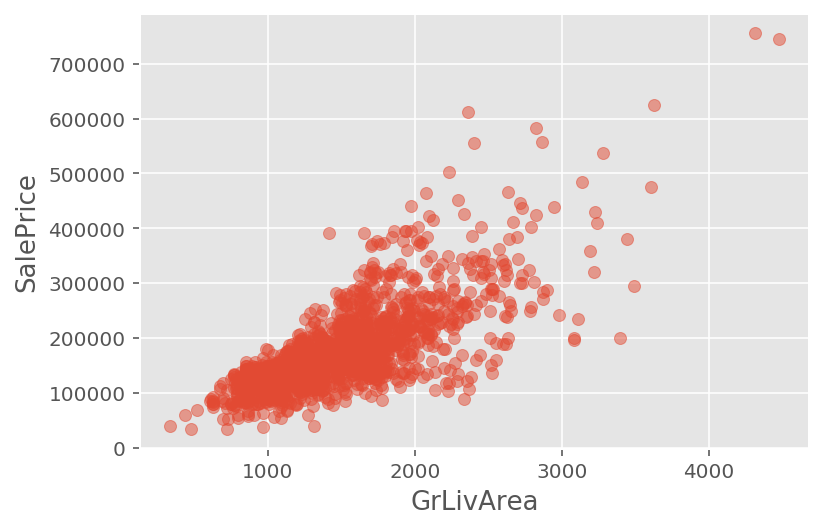

In [87]:
#remove outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

# see the plot again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'], alpha=0.5)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Now, let's take a look at the histogram of our sale price to see whetehr it follows a normal disturbition. It is known that normally distributed columns behaves well in linear regression. 

Since the normality is essential for many models, let's examine some the target and some of the features.

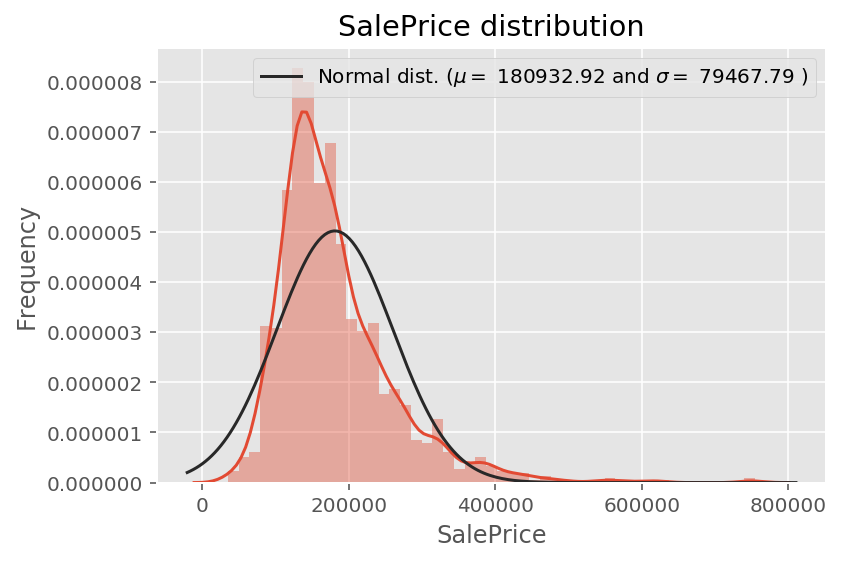

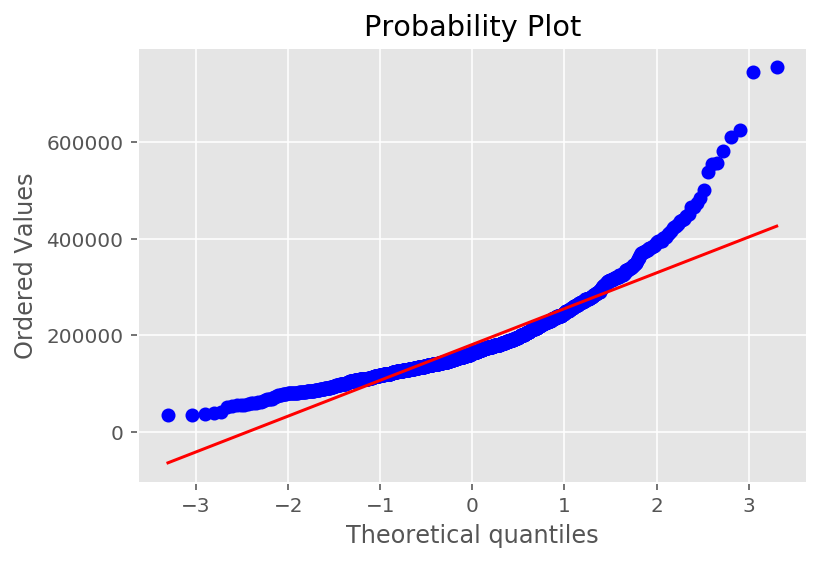

In [88]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

It seems that our normal distribution is skewed to the right. It also does not fit the QQ-plot nicely. Therefore, it would be a good idea to transform our dataset to a normal disturbtion using "log."


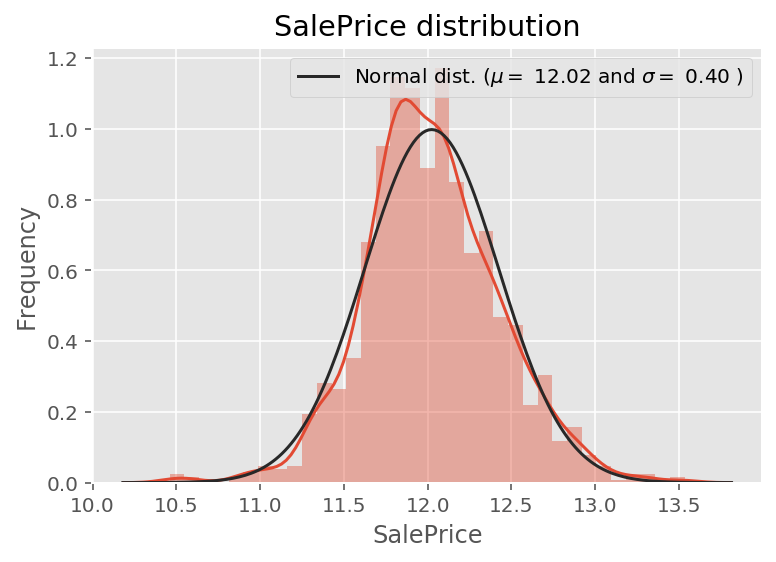

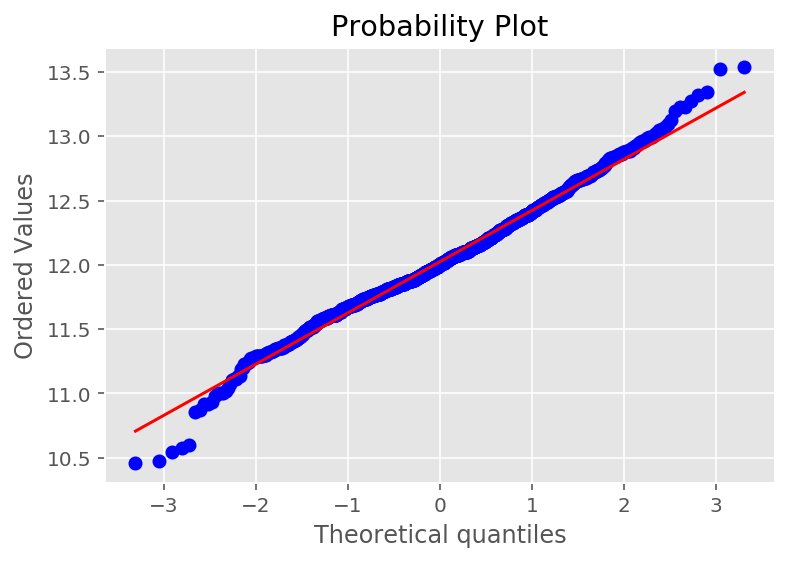

In [89]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

We can see that after the log transformation our SalePrice behaves normally, thus enhancing the performance of our model.

In order to clean our data easier, let's merge our training and testing into one large dataset.

In [90]:
# Merge the datasets 
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


### Imputing Missing Data

In [91]:
# Find null values percentage
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:40]
missing_data = pd.DataFrame({'missing_percentage' :all_data_na})
missing_data.head(40)

,missing_percentage
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


In [92]:
missing_data.shape

(34, 1)

Now, we've seen the percentage of missing data. Let's deal with each one of them.

For the pool quality, it sounds reasonable to have null values, given that their area is zero, meaning no pool exists in that house.

**PoolQC**: let's fill it with None instead of nan

In [93]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

For the **MiscFeature**, let's fill the null values with None

In [94]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")


For **Alley**, let's fill the null values with None

In [95]:
all_data["Alley"] = all_data["Alley"].fillna("None")

For **Fence**, let's fill the null values with None

In [96]:
all_data["Fence"] = all_data["Fence"].fillna("None")

For **FirePlaceQu**, let's fill the null values with None

In [97]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


For the **LotFrontage**, let's fill it in with the median of that neighborhood in which it exists since in general each neighborhood will have houses with similar style.

In [98]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

For the **'GarageType'**, **'GarageFinish'**, **'GarageQual'**, **'GarageCond'**, let's fill it with None

In [99]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')


For the **'GarageYrBlt'**, **'GarageArea'**, and **'GarageCars'**, let's fill it with zero, since the null value here means it doesn't have a garage in the first place

In [100]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

For '**BsmtFinSF1**', '**BsmtFinSF2**', '**BsmtUnfSF**','**TotalBsmtSF**', '**BsmtFullBath**', '**BsmtHalfBath**', let's fill it in with zero since they represent a continous variable

In [101]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

For '**BsmtQual**', '**BsmtCond**', '**BsmtExposure**', '**BsmtFinType1**', '**BsmtFinType2**', let's fill it in with None

In [102]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

For **"MasVnrType"** and **"MasVnrArea"**, let's fill it in with None and 0 accordingly

In [103]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

For "**MSZoning**", let's just fill it with the mode since the overhwleming majority of this feature is "RL"

In [104]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])


For **Utilities**, it seems that roughly all of it has AllPub with only one value "NoSeWa." It has also 2 Null values. Therefore, let's just drop it completely since it's not adding much for our model.

In [105]:
# unique values
all_data["Utilities"].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [106]:
# null values count
all_data["Utilities"].isna().sum()

2

In [107]:
# drop Utilities 
all_data = all_data.drop(['Utilities'], axis=1)

For "**Functional**", in the documunation, it says assume typical, and also it is the mode! 

In [108]:
all_data["Functional"].value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [109]:
all_data["Functional"].isna().sum()

2

In [110]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")


For "**Electrical**", most houses have SBrKr electrical system. Thefore, let's replace the null values with the mode.

In [111]:
all_data['Electrical'].value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [112]:
all_data["Electrical"].isna().sum()

1

In [113]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


For "**KitchenQual**", it seems reasonable to replace the null value with the mode

In [114]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [115]:
# count the number of nulls
all_data['KitchenQual'].isna().sum()

1

In [116]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

For "**Exterior1st**" and "**Exterior2nd**", let's replace them with the mode as well.

In [117]:
# count the number of nulls 
all_data['Exterior1st'].isna().sum(), all_data['Exterior2nd'].isna().sum()

(1, 1)

In [118]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

For "**SaleType**", let's replace the null value with the mode

In [119]:
all_data['SaleType'].isna().sum()

1

In [120]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [121]:
all_data['MSSubClass'].isna().sum()

0

In [122]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#### Now, we're done with imputing null values. Let's double check our work!

In [123]:
# Find null values percentage
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:40]
missing_data = pd.DataFrame({'missing_percentage' :all_data_na})
missing_data.head(40)

,missing_percentage


Now, our data is clean nad has a high correlation with mutiple features, we can probably predict the prices we good accuracy.

### Correlation Heatmap

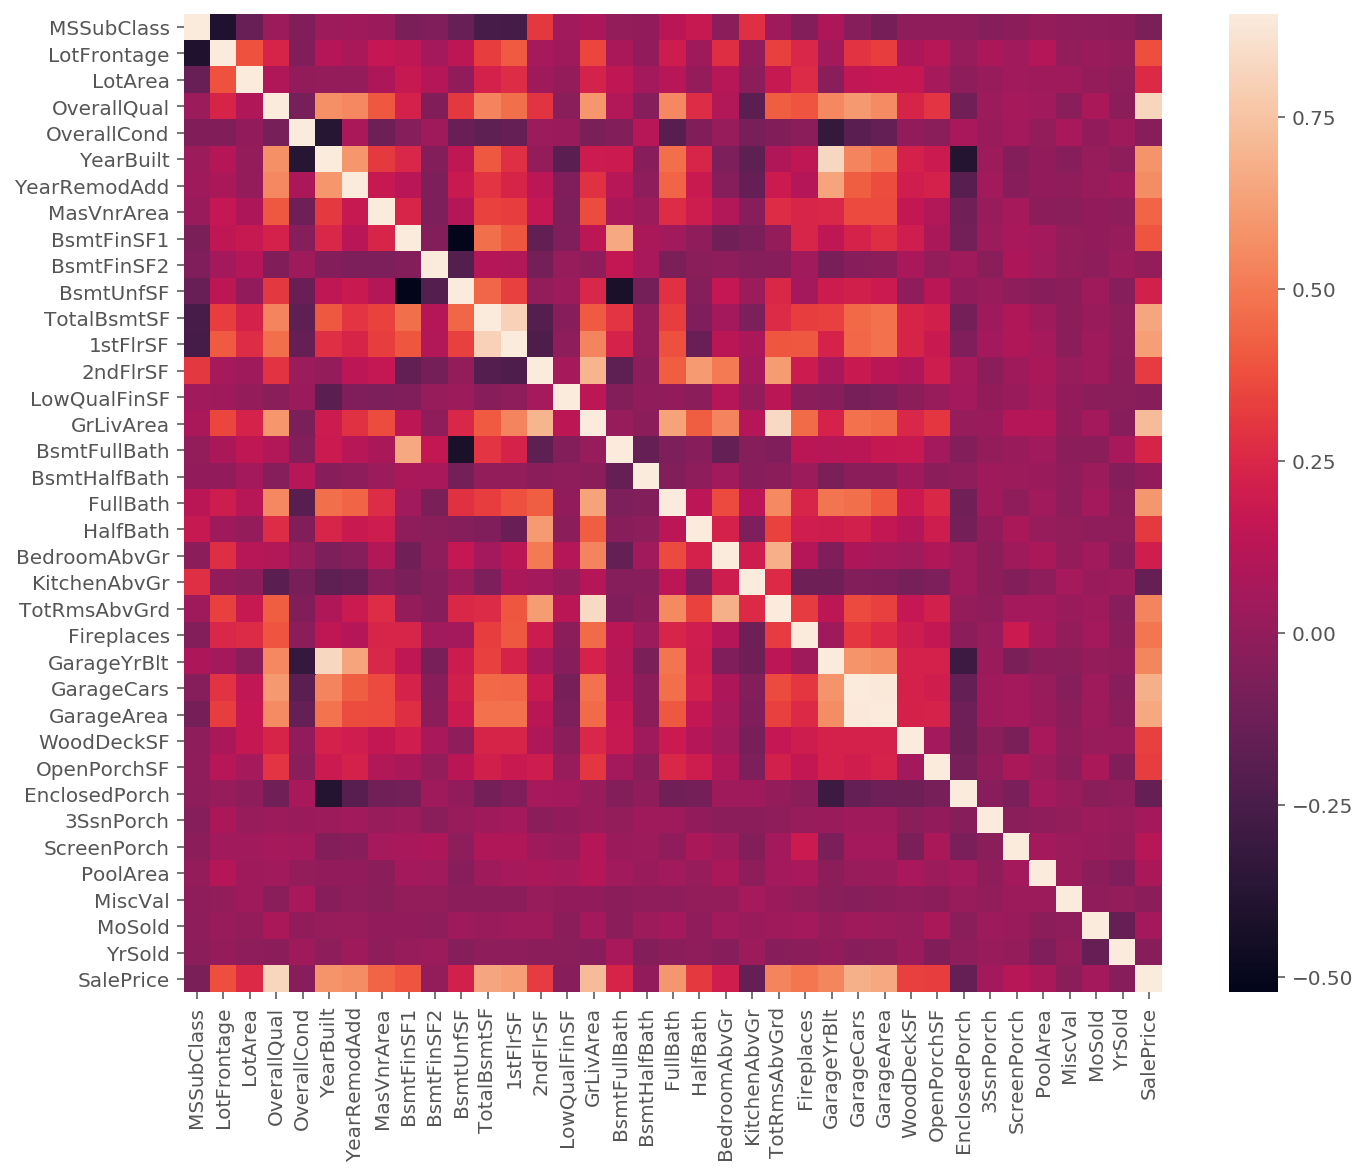

In [124]:
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True);

By looking at the heatmap, we can notice that some features might be co-linear with each other. Specifically, the light squares for GarageYrBlt-YearBuilt, GrLivArea-TotRmAbvGrd, TotalBsmSF-1stFlrSF, and GarageArea-GarageCars.

# Features engineering

### Transform numerical variables to categorical

In [125]:
#change building into categorical
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#change overall condition into categorical
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#year and month makes more sense to be categorical 
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Label Encoding

In [126]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


### New Feature

In [127]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

## Skewed features

For many models, working with skewed datasets can negatively affect the scoring of the model. Let's take a look at the skewed numeric features 

In [128]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(len(numeric_feats))



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


Let's normalize any skewed feature above 0.75 with Box-Cox method, which is known to work better than simply taking the log or the square root.

In [129]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#something to consider is to transform the skewed columns belew 0

There are 59 skewed numerical features to Box Cox transform


# Dummies!

In [130]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [131]:
# now, it's time to separate our datasets to build our model
df_train = all_data[:ntrain]
df_test = all_data[ntrain:]

# Modeling

In [132]:
from sklearn.linear_model import ElasticNet, Lasso,  Ridge, LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

In [133]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, test_size = 0.3, random_state = 0)

In [134]:
# Transform your dataset with Robust Scalar to decrease the influence of the outliers
rs = RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_test_s = rs.transform(X_test)

In [135]:
#Validation function

def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train_s, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def rmsle_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test_s, y_test, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

### 1- Baseline 

In [136]:
# Create a dummy regressor
dummy_mean = DummyRegressor(strategy='mean')

# "Train" dummy regressor
dummy_mean.fit(X_train_s, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [138]:
# Get score of train and test
model = dummy_mean
score = rmsle_cv(model)
print("\nBaseline model train score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))
score = rmsle_cv_test(model)
print("\nBaseline model Test score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))


Baseline model train score: 0.3946 ± 0.0206


Baseline model Test score: 0.4118 ± 0.0264



Not too bad for a baseline model, but we can do better than this. Let's try explore more complex models.

### 2- Linear Regression

In [499]:
lm = LinearRegression()
lm.fit(X_train_s, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [500]:
# Get score of train and test
model = lm
score = rmsle_cv(model)
print("\nLinear model train score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))
score = rmsle_cv_test(model)
print("\nLinear model Test score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))


Linear model train score: 0.1320 ± 0.0184


Linear model Test score: 0.1655 ± 0.0192



### 3- Lasso

In [139]:
# lasso model
ls = Lasso()
# grid serach
param = {"alpha":np.logspace(-4,-3)}
grid_lasso = GridSearchCV(ls, param, cv=5, n_jobs=-1)
grid_lasso.fit(X_train_s, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([0.0001    , 0.00010481, 0.00010985, 0.00011514, 0.00012068,
       0.00012649, 0.000...
       0.00032375, 0.00033932, 0.00035565, 0.00037276, 0.00039069,
       0.00040949, 0.00042919, 0.00044984, 0.00047149, 0.00049417,
       0.00051795, 0.00054287, 0.00056899, 0.00059636, 0.00062506,
       0.00065513, 0.00068665, 0.00071969, 0.00075431, 0.0007906 ,
       0.00082864, 0.00086851, 0.0009103 , 0.0009541 , 0.001     ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [140]:
# Get the best parameter
grid_lasso.best_params_['alpha']

0.0007196856730011522

In [141]:
# let's see how many features we've lost
ls = Lasso(alpha=grid_lasso.best_params_['alpha'])
ls.fit(X_train_s,y_train)

nremoved_features = ls.coef_.shape[0] - ls.coef_[ls.coef_!=0].shape[0]
print(f"\nNumber of removed features for lasso: {nremoved_features} \n")
print(f"Current lasso Features: {ls.coef_[ls.coef_!=0].shape[0]}")


Number of removed features for lasso: 135 

Current lasso Features: 85


In [142]:
# Get score of train and test
model = ls
score = rmsle_cv(model)
print("\nLasso model train score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))
score = rmsle_cv_test(model)
print("\nLasso model Test score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))


Lasso model train score: 0.1156 ± 0.0136


Lasso model Test score: 0.1195 ± 0.0146



Let's take a look at the most important features

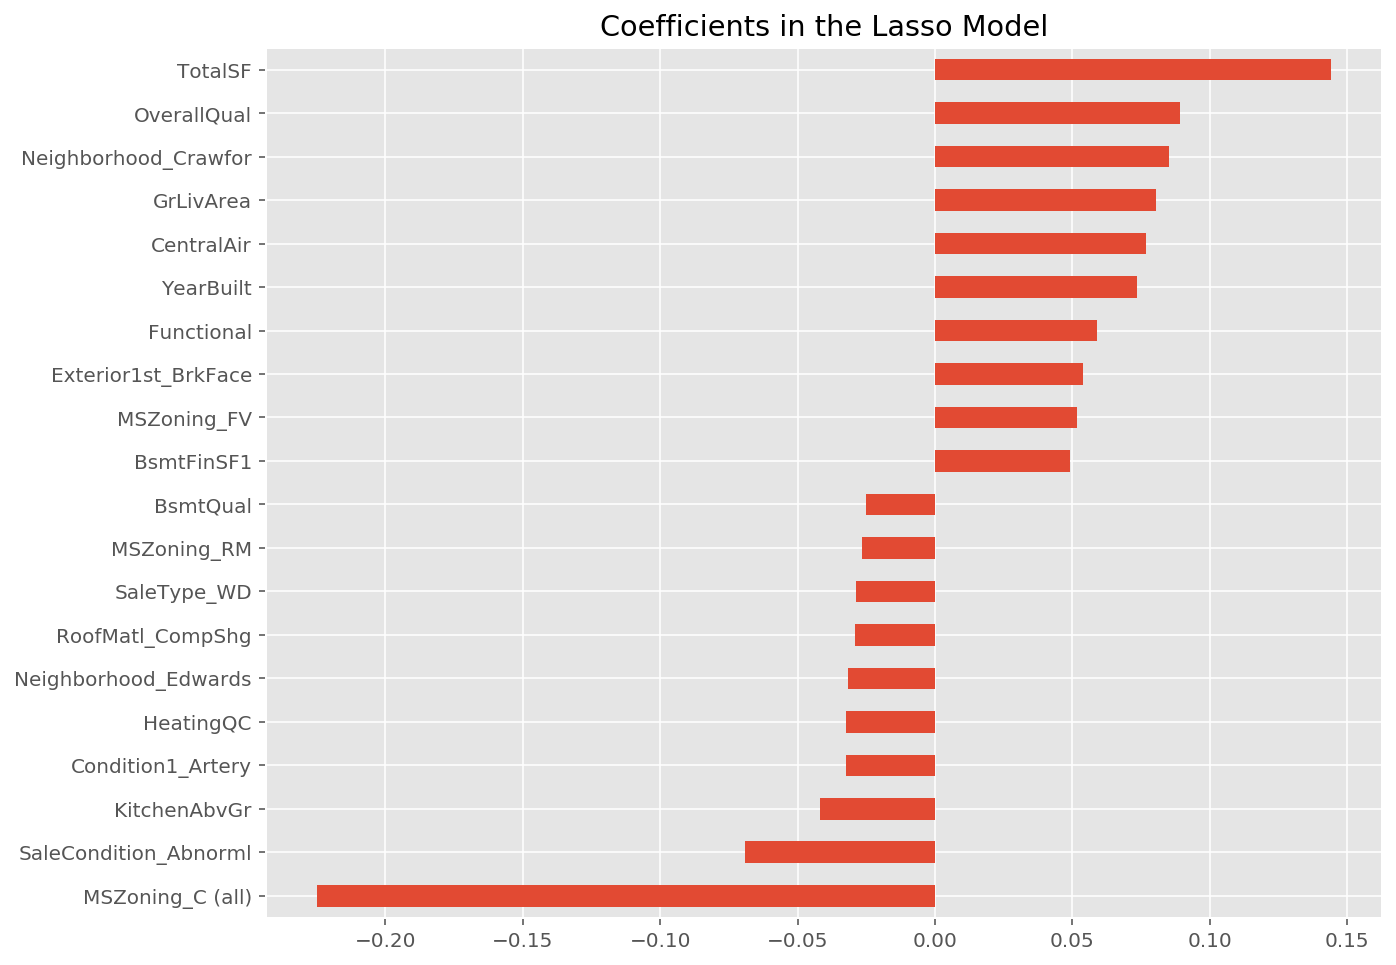

In [143]:
coef = pd.Series(ls.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
fig, ax = plt.subplots(figsize=(10,8))
imp_coef.plot(kind = "barh",ax=ax)
plt.title("Coefficients in the Lasso Model");

### 4- Ridge

In [506]:
ridge = Ridge()
param = {"alpha":np.logspace(0,2)}
grid_ridge = GridSearchCV(ridge, param, cv=5, n_jobs=-1)
grid_ridge.fit(X_train_s, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([  1.        ,   1.09854114,   1.20679264,   1.32571137,
         1.45634848,   1.59985872,   1.75751062,   1.93069773,
         2.12095089,   2.32995181,   2.55954792,   2.8117687...
         9.54095476,  10.48113134,  11.51395399,  12.64855217,
        13.89495494,  15.26417967,  16.76832937,  18.42069969,
        20.23589648,  22.22996483,  24.42053095,  26.82695795,
        29.47051703,  32.37457543,  35.56480306,  39.06939937,
        42.9193426 ,  47.14866363,  51.79474679,  56.89866029,
        62.50551925,  68.6648845 ,  75.43120063,  82.86427729,
        91.0298178 , 100.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [507]:
# Get the best parameter
grid_ridge.best_params_['alpha']

16.768329368110074

In [508]:
# Get score of train and test
model = ridge
score = rmsle_cv(model)
print("\nRidge model train score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))
score = rmsle_cv_test(model)
print("\nRidge model Test score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))


Ridge model train score: 0.1214 ± 0.0140


Ridge model Test score: 0.1293 ± 0.0178



It seems that the Ridge model is performing less than the Lasso model. Let's try ElasticNet

### 5- ElasticNet

In [533]:
elastic = ElasticNet()
param = {"alpha":np.logspace(-4,2),
         'l1_ratio':[0, 0.25, 0.5, 0.75, 0.9, 1]}
grid_elastic = GridSearchCV(elastic, param, cv=5, n_jobs=-1)
grid_elastic.fit(X_train_s, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 1.32571137e-04, 1.75751062e-04, 2.32...
       8.28642773e-01, 1.09854114e+00, 1.45634848e+00, 1.93069773e+00,
       2.55954792e+00, 3.39322177e+00, 4.49843267e+00, 5.96362332e+00,
       7.90604321e+00, 1.04811313e+01, 1.38949549e+01, 1.84206997e+01,
       2.44205309e+01, 3.23745754e+01, 4.29193426e+01, 5.68986603e+01,
       7.54312006e+01, 1.00000000e+02]),
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 0.9, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_t

In [535]:
# Get the best parameter
grid_elastic.best_params_

{'alpha': 0.021209508879201904, 'l1_ratio': 0}

In [538]:
# Get score of train and test
model = elastic
score = rmsle_cv(model)
print("\nElastic model train score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))
score = rmsle_cv_test(model)
print("\nElastic model Test score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))


Elastic model train score: 0.3733 ± 0.0187


Elastic model Test score: 0.3879 ± 0.0331



Simply by looking at the parameters for our GridSearch, we notice that the L1 Ratio is 0, meaning it is Ridge! The score is performing much worse

### 6- KNN

In [540]:
knn = KNeighborsRegressor()

param = {"n_neighbors":[1,5,10,15,20,25,30,40,50],'weights':['uniform','distance']}
grid_knn = GridSearchCV(knn, param, cv=5, n_jobs=-1)
grid_knn.fit(X_train_s, y_train)




GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20, 25, 30, 40, 50],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [541]:
# Get the best parameter
grid_knn.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [542]:
# Get score of train and test
model = knn
score = rmsle_cv(model)
print("\n KNN model train score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))
score = rmsle_cv_test(model)
print("\n KNN model Test score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))


 KNN model train score: 0.1974 ± 0.0138


 KNN model Test score: 0.2260 ± 0.0193



The KNN does not seem to perform well for our model. Therfore, let's discard it.

### 7- Decision Tree

In [144]:
dt = DecisionTreeRegressor()

param = {"max_depth":[1,5,10,15,20,25,30,40,50]}
grid_dt = GridSearchCV(dt, param, cv=5, n_jobs=-1)
grid_dt.fit(X_train_s, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20, 25, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [145]:
# Get the best parameter
grid_dt.best_params_['max_depth']

5

In [146]:
max_depth = grid_dt.best_params_['max_depth']
#fit the model
decision = DecisionTreeRegressor(max_depth=max_depth)
decision.fit(X_train_s, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [147]:
# Get score of train and test
model = decision
score = rmsle_cv(model)
print("\n Decision Tree model train score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))
score = rmsle_cv_test(model)
print("\n Decision Tree model Test score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))


 Decision Tree model train score: 0.1940 ± 0.0107


 Decision Tree model Test score: 0.2094 ± 0.0124



The decision tree method performs better than KNN, but still not as good as Lasso or Ridge. Let's try more advance enseamble methods.

### 8- Random Forest

In [148]:
rf = RandomForestRegressor()


param = {"n_estimators":[50,100,150]}
grid_rf = GridSearchCV(rf, param, cv=5, n_jobs=-1)
grid_rf.fit(X_train_s, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1, param_grid={'n_estimators': [50, 100, 150]},
             

In [149]:
# Get the best parameter
grid_rf.best_params_

{'n_estimators': 150}

In [150]:

n_estimators = grid_rf.best_params_['n_estimators']
#fit the model 
rand_forest = RandomForestRegressor(n_estimators=n_estimators)
rand_forest.fit(X_train_s, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [151]:
# Get score of train and test
model = rand_forest
score = rmsle_cv(model)
print("\n Random Forest model train score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))
score = rmsle_cv_test(model)
print("\n Random Forest model Test score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))


 Random Forest model train score: 0.1444 ± 0.0152


 Random Forest model Test score: 0.1501 ± 0.0152



The random forest is perfomring better than decision tree, but still not close to Lasso or Ridge

### 9- Adaboost

In [644]:
ab = AdaBoostRegressor()


param = {"n_estimators":[150, 200, 250, 300, 350],
        "learning_rate":[1, 2, 3, 4]}
grid_ab = GridSearchCV(ab, param, cv=5, n_jobs=-1)
grid_ab.fit(X_train_s, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3, 4],
                         'n_estimators': [150, 200, 250, 300, 350]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [645]:
# Get the best parameter
grid_ab.best_params_

{'learning_rate': 3, 'n_estimators': 250}

In [646]:
learning= grid_ab.best_params_['learning_rate']
n_estimator= grid_ab.best_params_['n_estimators']

#fit the model again
adaboost = AdaBoostRegressor(learning_rate=learning, n_estimators=n_estimator)
adaboost.fit(X_train_s, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=3, loss='linear',
                  n_estimators=250, random_state=None)

In [660]:
# Get score of train and test
model = adaboost
score = rmsle_cv(model)
print("\n Adaboost model train score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))
score = rmsle_cv_test(model)
print("\n Adaboost model Test score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))


 Adaboost model train score: 0.1618 ± 0.0105


 Adaboost model Test score: 0.1598 ± 0.0090



Adaboost is performing a bit worse than Random Forset.

### 10- Bagging

In [152]:
# Let's see whether decision tree or Lasso will work best as a base_estimator for bagging
bag = BaggingRegressor()


param = {"base_estimator":[DecisionTreeRegressor(max_depth=grid_dt.best_params_['max_depth']), Lasso(alpha=grid_lasso.best_params_['alpha'])],
         "n_estimators":[50,100,150,200,250,300]
        }
grid_bag = GridSearchCV(bag, param, cv=5, n_jobs=-1)
grid_bag.fit(X_train_s, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeRegressor(criterion='mse',
                                                                  m...
                                                                  random_state=None,
                                                                  splitter='best'),
                                            Lasso(alpha=0.0007196856730011522,
                                                  copy_X=True,
             

In [153]:
# Check the best paramaters
grid_bag.best_params_

{'base_estimator': Lasso(alpha=0.0007196856730011522, copy_X=True, fit_intercept=True,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 'n_estimators': 50}

It seems that Lasso works better as a base-estimator than decision tree for bagging. 

In [154]:
n_estimator = grid_bag.best_params_['n_estimators']
alpha = grid_lasso.best_params_['alpha']
# Fit the model
bagging = BaggingRegressor(base_estimator=Lasso(alpha=alpha),n_estimators=n_estimator )
bagging.fit(X_train_s, y_train)

BaggingRegressor(base_estimator=Lasso(alpha=0.0007196856730011522, copy_X=True,
                                      fit_intercept=True, max_iter=1000,
                                      normalize=False, positive=False,
                                      precompute=False, random_state=None,
                                      selection='cyclic', tol=0.0001,
                                      warm_start=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=50, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [155]:
# Get score of train and test
model = bagging
score = rmsle_cv(model)
print("\n Bagging  model train score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))
score = rmsle_cv_test(model)
print("\n Bagging model Test score: {:.4f} ± {:.4f}\n".format(score.mean(), score.std()))


 Bagging  model train score: 0.1140 ± 0.0142


 Bagging model Test score: 0.1169 ± 0.0147



So far Bagging with lasso performs the best! Let's use it for our final model.

# Save and predict your testing set

In [110]:
# calculate root meas square error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [665]:
# Calcualte score for your training set
pred_train = bagging.predict(pd.DataFrame(X_train_s).values)
pred_real_test = np.expm1(bagging.predict(rs.transform(df_test))) # predict the unkown data (df_test) to upload it on Kaggle
print(rmsle(y_train, pred_train))

0.101437463587417


In [668]:
# Calculate score for testing set
pred_test = (bagging.predict(pd.DataFrame(X_test_s).values))
print(rmsle(y_test, pred_test))


0.10879008413245182


In [667]:
# save the predicted values as csv for later submission on Kaggle
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = pred_real_test
sub.to_csv('submission.csv',index=False)

# Wrap-up:

Lasso worked the best becasue it removes some of the unncessary features which are co-linear. Now, we've cleaned our data, imputed the null values, engineered new features, and build several models with bagging and lasso giving the best score. The goals of this project was accomplished which is to predict the prices of houses.
